In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [12]:
data_raw=pd.read_csv("./csvfiles/통신고객이탈.csv")

In [13]:
data = data_raw.copy()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
CHURN                 930 non-null int64
CUSTOMER_ID           930 non-null object
GENDER                930 non-null object
AGE                   930 non-null int64
CHARGE_TYPE           930 non-null object
HANDSET               930 non-null object
USAGE_BAND            930 non-null object
SERVICE_DURATION      930 non-null float64
DROPPED_CALLS         930 non-null int64
PEAK_CALLS_NO         930 non-null int64
PEAK_CALLS_TIME       930 non-null float64
WEEKEND_CALLS_NO      930 non-null int64
WEEKEND_CALLS_TIME    930 non-null float64
TOTAL_CALLS_NO        930 non-null int64
TOTAL_CALLS_TIME      930 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 109.1+ KB


## churn 유저 1, 0으로 바꾸기(1-churn, 0-active)

In [15]:
z = {"Active":0, "Churned":1}

In [16]:
data["CHURN"]=data["CHURN"].map(z)

In [18]:
data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


### 결측치 확인

In [19]:
data.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [20]:
data_corr = data.corr()

In [22]:
data_corr["CHURN"].sort_values()

AGE                  -0.088926
SERVICE_DURATION     -0.083079
TOTAL_CALLS_TIME     -0.027112
TOTAL_CALLS_NO       -0.021957
PEAK_CALLS_NO        -0.021916
PEAK_CALLS_TIME      -0.019240
WEEKEND_CALLS_NO     -0.008974
WEEKEND_CALLS_TIME    0.004333
DROPPED_CALLS         0.197524
CHURN                 1.000000
Name: CHURN, dtype: float64

<Figure size 576x576 with 0 Axes>

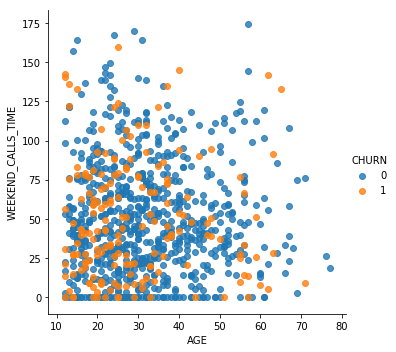

In [58]:
plt.figure(figsize = (8,8))
sns.lmplot(x = "AGE", y ="WEEKEND_CALLS_TIME", data=data, hue="CHURN",fit_reg=False)

<Figure size 576x576 with 0 Axes>

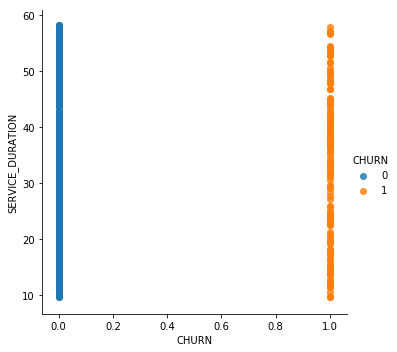

In [30]:
plt.figure(figsize = (8,8))
sns.lmplot(x = "CHURN", y ="SERVICE_DURATION", data=data, hue="CHURN",fit_reg=False)

In [33]:
np.random.seed(seed=1234)
msk = np.random.rand(data.shape[0]) < 0.7
train = data[msk]
test = data[~msk]
print("train {}".format(train.shape))
print("test {}".format(test.shape))

train (635, 15)
test (295, 15)


In [34]:
train_constant = sm.add_constant(train)
train_constant.head()

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1.0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1.0,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1.0,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,1.0,0,K105530,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1.0,0,K106210,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2


In [41]:
log_model = sm.Logit.from_formula("CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET)+C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO+WEEKEND_CALLS_TIME+TOTAL_CALLS_NO+TOTAL_CALLS_TIME+1", train_constant)
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.261293
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                           29
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:                  0.4660
Time:                        09:48:26   Log-Likelihood:                -165.92
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 9.369e-45
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.1342      2

In [42]:
y_pred = log_result.predict(test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

3    0
4    0
7    0
8    0
9    0
dtype: int64

In [45]:
# 평가
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(test["CHURN"],y_pred_class)))

Accuracy : 0.898


<Figure size 1080x1080 with 0 Axes>

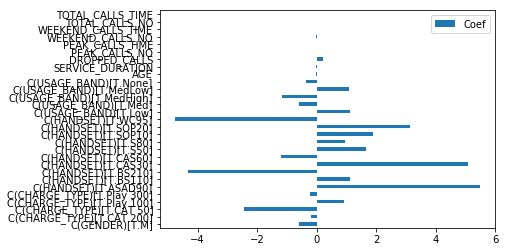

In [48]:
plt.figure(figsize = (15,15))
ds_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
ds_logistic_coef.plot.barh(y="Coef")

In [50]:
import graphviz